In [ ]:
pip install pgmpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

In [ ]:
cpd_guest = TabularCPD('Guest',3,[[0.33],[0.33],[0.33]])
cpd_price = TabularCPD('Price',3,[[0.33],[0.33],[0.33]])
cpd_host = TabularCPD('Host',3,[[0,0,0,0,0.5,1,0,1,0.5],
                                [0.5,0,1,0,0,0,1,0,0.5],
                                [0.5,1,0,1,0.5,0,0,0,0]],
                      evidence=['Guest','Price'],evidence_card=[3,3])

In [ ]:
from pgmpy.models import BayesianModel  # Import BayesianModel directly in this cell

model = BayesianModel([('Guest', 'Host'), ('Price', 'Host')])

In [ ]:
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [ ]:
model.check_model()

True

In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
infer = VariableElimination(model)
posterior_p = infer.query(['Host'],evidence ={'Guest':2,'Price':2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


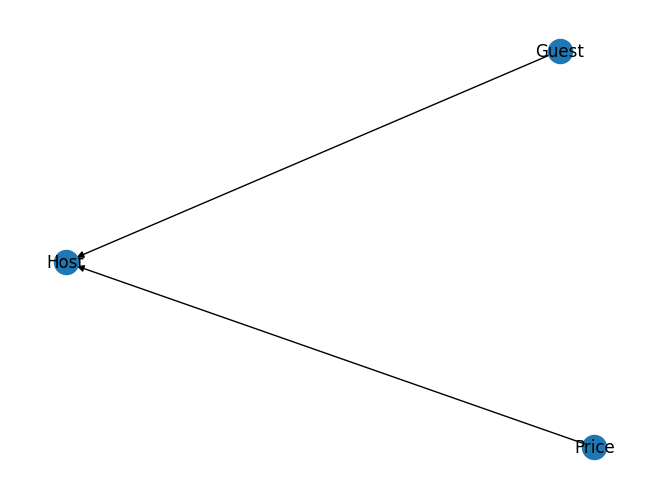

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

model = nx.DiGraph()

model.add_nodes_from (['Guest','Price','Host'])

model.add_edges_from([('Guest','Host'),('Price','Host')])

nx.draw(model,with_labels=True)
plt.show()
plt.savefig('Final-output.png')
plt.close()